In [1]:
from IPython.display import IFrame

### hi 👋, I'm Alonso {.smaller}

- Researcher on Generative AI at Nokia Bell Labs
- AI Consultant/Trainer
- PhD at Inria, post-doc at UC Berkeley
- Based in Paris, France
- [https://alonsosilvaallende.github.io/](https://alonsosilvaallende.github.io/)
    - Github: [https://github.com/alonsosilvaallende/](https://github.com/alonsosilvaallende/)
    - Twitter: [@alonsosilva](https://twitter.com/alonsosilva)
    - Bluesky: [https://bsky.app/profile/alonsosilva.bsky.social](https://bsky.app/profile/alonsosilva.bsky.social)
    - Mastodon: [https://sigmoid.social/@alonsosilva](https://sigmoid.social/@alonsosilva)
    - Linkedin: [https://www.linkedin.com/in/alonsosilvaallende/](https://www.linkedin.com/in/alonsosilvaallende/)

# Introduction

##
::: {style="margin-top: 100px; font-size: 2em; color: black;"}
The problem
:::

##

![scikit-llm: [https://skllm.beastbyte.ai/](https://skllm.beastbyte.ai/)](./assets/scikit-llm.jpg "scikit-llm Homepage"){ width=50% }

### Show me the prompt!

![scikit-llm prompts: [https://github.com/iryna-kondr/scikit-llm/blob/main/skllm/prompts/templates.py](https://github.com/iryna-kondr/scikit-llm/blob/main/skllm/prompts/templates.py)](./assets/scikit-llm-prompt.jpg "scikit-llm prompt"){ width=25% }

###

![](./assets/we-can-do-better.jpg "We can do better!"){ width=50% }

###
::: {style="margin-top: 200px; font-size: 2em; color: black;"}
What is NOT Structured Generation?
:::

### Structured Outputs (in the style of Instructor/Marvin libraries)

- Instructor: [https://python.useinstructor.com/](https://python.useinstructor.com/)
- Marvin: [https://www.askmarvin.ai/](https://www.askmarvin.ai/)

:::: {.content-hidden}

::: {.column width="30%"}
![](./assets/llama-cpp-logo.png "llama.cpp logo"){width="50%"}
:::

::: {.column width="40%"}
![](./assets/llama-cpp-python-logo.svg "llama-cpp-python logo"){width="30%"}
:::

::: {.column width="30%"}
![](./assets/NousResearch.jpg "NousResearch logo"){width="30%"}
:::

::::

### Structured Outputs in Code

In [2]:
#| echo: true
import llama_cpp  

model_id = "NousResearch/Hermes-3-Llama-3.1-8B" # <1>
llm = llama_cpp.Llama(  # <2>
    "/big_storage/llms/models/Hermes-3-Llama-3.1-8B.Q6_K.gguf",
    tokenizer=llama_cpp.llama_tokenizer.LlamaHFTokenizer.from_pretrained(
        model_id
    ),
    n_gpu_layers=-1,
    flash_attn=True,
    n_ctx=8192,
    verbose=False,
    chat_format="chatml-function-calling"
)

llama_new_context_with_model: n_ctx_per_seq (8192) < n_ctx_train (131072) -- the full capacity of the model will not be utilized


1. [Hermes 3](https://nousresearch.com/hermes3/) by [NousResearch](https://nousresearch.com/)
2. [llama-cpp-python](https://llama-cpp-python.readthedocs.io/) python bindings for [llama.cpp](https://github.com/ggerganov/llama.cpp)

### Structured Outputs in Code

In [3]:
#| echo: true
from typing import Literal

from pydantic import BaseModel, Field


class Sentiment(BaseModel):
    """Correctly inferred `Sentiment` with all the required parameters
    with correct types."""

    label: Literal["Positive", "Negative"] = Field(
        ..., description="Sentiment of the text"
    )

### Structured Outputs in Code

In [4]:
#| echo: true
from langchain_core.utils.function_calling import convert_to_openai_tool

tools = [convert_to_openai_tool(Sentiment)]
tools

[{'type': 'function',
  'function': {'name': 'Sentiment',
   'description': 'Correctly inferred `Sentiment` with all the required parameters\nwith correct types.',
   'parameters': {'properties': {'label': {'description': 'Sentiment of the text',
      'enum': ['Positive', 'Negative'],
      'type': 'string'}},
    'required': ['label'],
    'type': 'object'}}}]

In [5]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Structured Outputs in Code

In [6]:
#| echo: true
#| code-line-numbers: "1-17|1|1,8-9|1,8-9,13-14"
user_input = "You are great"

output = llm.create_chat_completion(
    messages=[
        {
            "role": "user",
            "content": (
                "What is the sentiment conveyed in the following text: "
                f"{user_input}."
            ),
        },
    ],
    tools=tools,
    tool_choice={"type": "function", "function": {"name": "Sentiment"}},
)

output["choices"][0]["message"]["tool_calls"][0]["function"]["arguments"]

'{ "label": "Positive"}'

##

![](./assets/we-can-do-better.jpg "We can do better!"){ width=50% }

# What is Structured Generation?

### {.nostretch}

![](./assets/outlines-logo.webp "Outlines logo"){width="40%"}

[https://dottxt-ai.github.io/outlines/](https://dottxt-ai.github.io/outlines/)

### Observation: LLMs are samplers

[https://alonsosilva-nexttokenprediction.hf.space](https://alonsosilva-nexttokenprediction.hf.space)

In [7]:
IFrame("https://alonsosilva-nexttokenprediction.hf.space", width=950, height=450)

###  We need to talk about Regular Expressions (regex)

![](./assets/torture-regex.jpg "Let the torture commence meme"){ width=50% }

### Regular Expression (regex)

![](./assets/regex_chatgpt.jpg "ChatGPT explaining the regex a*b*"){ width=25% }

### Deterministic Finite Automata (DFA) {.nostretch}

![](./assets/Structured-Generation-1.jpg "Diagrams explaining"){fig-align="center" width="50%"}

[Fast, High-Fidelity LLM Decoding with Regex Constraints](https://github.com/vivien000/regex-constrained-decoding) by [Vivien Tran-Thien](https://github.com/vivien000)

### Deterministic Finite Automata (DFA) {.nostretch}

![](./assets/Structured-Generation-2.jpg "Diagrams explaining"){fig-align="center" width="50%"}

[Fast, High-Fidelity LLM Decoding with Regex Constraints](https://github.com/vivien000/regex-constrained-decoding) by [Vivien Tran-Thien](https://github.com/vivien000)

### Deterministic Finite Automata (DFA) {.nostretch}

![](./assets/Structured-Generation-3.jpg "Diagrams explaining"){fig-align="center" width="60%"}

[Fast, High-Fidelity LLM Decoding with Regex Constraints](https://github.com/vivien000/regex-constrained-decoding) by [Vivien Tran-Thien](https://github.com/vivien000)

### Back to the problem

![scikit-llm prompts: [https://github.com/iryna-kondr/scikit-llm/blob/main/skllm/prompts/templates.py](https://github.com/iryna-kondr/scikit-llm/blob/main/skllm/prompts/templates.py)](./assets/scikit-llm-prompt.jpg "scikit-llm prompt"){ width=25% }

### From regular expression (regex) to deterministic finite automata (DFA)

For example, for sentiment analysis:

![](./assets/fsm-simple.jpg){ width=25% }

### Life is hard

![](./assets/fsm-full.jpg){ width=25% }

### What's in a "label"?

![](./assets/what-is-in-a-label.jpg){ width=25% }

### Structured Generation in Code

In [8]:
#| echo: true
#| source-line-numbers: "3"
#| class-source: "numberLines"
import outlines

import transformers

outlines_tokenizer = outlines.models.TransformerTokenizer(
    transformers.AutoTokenizer.from_pretrained(model_id)
)

outlines_logits_processor = outlines.processors.JSONLogitsProcessor(
    Sentiment,
    outlines_tokenizer,
    whitespace_pattern=r"[\n\t ]*"  # <1>
)

1. I like to give the language model some structure but also some leeway.

### Structured Generation in Code

In [9]:
#| echo: true
#| code-line-numbers: "1-18|13-15"
user_input = "You are great"

output = llm.create_chat_completion(
    messages=[
        {
            "role": "user",
            "content": (
                "What is the sentiment conveyed in the following text: "
                f"{user_input}."
            ),
        },
    ],
    logits_processor=transformers.LogitsProcessorList(
        [outlines_logits_processor]
    ),
)

output["choices"][0]["message"]["content"]

'{ "label": "Positive" }'

## Structured Outputs + Structured Generation

###

In [10]:
outlines_logits_processor = outlines.processors.JSONLogitsProcessor(
    Sentiment,
    outlines_tokenizer,
    whitespace_pattern=r"[\n\t ]*"
)

In [11]:
#| echo: true
#| code-line-numbers: "1-18|12-13|14-16|1-18"
user_input = "You are great"
output = llm.create_chat_completion(
    messages=[
        {
            "role": "user",
            "content": (
                "What is the sentiment conveyed in the following text: "
                f"{user_input}."
            ),
        },
    ],
    tools=tools,  # <1>
    tool_choice={"type": "function", "function": {"name": "Sentiment"}}, # <1>
    logits_processor=transformers.LogitsProcessorList(  # <2>
        [outlines_logits_processor]  # <2>
    ),  # <2>
)
output["choices"][0]["message"]["tool_calls"][0]["function"]["arguments"]

'{ "label": "Positive"}'

1. Structured Outputs
2. Structured Generation

# Knowledge Graph Generation

### {.nostretch}

![](./assets/kuzu-logo.png "Kùzu logo"){width="40%"}

Graph database: [https://kuzudb.com/](https://kuzudb.com/)

### Consider a text

In [12]:
#| echo: true
with open('./assets/curie.txt', "r") as f:
    curie_text = f.read()
print(curie_text)

When Marie Curie came to the United States for the first time, in May 1921, she had already discovered the elements radium and polonium, coined the term “radio-active” and won the Nobel Prize—twice. But the Polish-born scientist, almost pathologically shy and accustomed to spending most of her time in her Paris laboratory, was stunned by the fanfare that greeted her. In 1898 she indeed identified one of the substances and named it polonium, after her homeland. Five months later, she identified a second element, which the world came to know as radium. Curie described the elements she studied as “radio-active.”

In 1894, she met Pierre Curie, a 35-year-old physicist at a French technical college who had been studying crystals and magnetism. More than a decade before, he and his brother Jacques had discovered piezoelectricity, the electric charge produced in solid materials under pressure. Pierre was taken by Marie’s uncommon intellect and drive, and he proposed to her. They were married 

### Chunk the text

In [13]:
#| echo: true
texts = curie_text.split("\n\n")
texts

['When Marie Curie came to the United States for the first time, in May 1921, she had already discovered the elements radium and polonium, coined the term “radio-active” and won the Nobel Prize—twice. But the Polish-born scientist, almost pathologically shy and accustomed to spending most of her time in her Paris laboratory, was stunned by the fanfare that greeted her. In 1898 she indeed identified one of the substances and named it polonium, after her homeland. Five months later, she identified a second element, which the world came to know as radium. Curie described the elements she studied as “radio-active.”',
 'In 1894, she met Pierre Curie, a 35-year-old physicist at a French technical college who had been studying crystals and magnetism. More than a decade before, he and his brother Jacques had discovered piezoelectricity, the electric charge produced in solid materials under pressure. Pierre was taken by Marie’s uncommon intellect and drive, and he proposed to her. They were mar

###

In [14]:
#| echo: true
from pydantic import BaseModel, Field
from typing import Optional

class Node(BaseModel):
    """Node of the Knowledge Graph"""
    id: int = Field(
        ..., description="Unique identifier of the node starting at zero"
    )
    type: str = Field(..., description="Type of the node")
    label: str = Field(..., description="Label of the node")

class Edge(BaseModel):
    """Edge of the Knowledge Graph"""
    source: int = Field(..., description="Unique source of the edge")
    target: int = Field(..., description="Unique target of the edge")
    type: str = Field(..., description="Type of the edge")
    label: str = Field(..., description="Label of the edge")

In [15]:
#| output: false
# from pydantic import BaseModel, Field
# from typing import Optional

# class Node(BaseModel):
#     """Node of the Knowledge Graph"""
#     id: int = Field(..., description="Unique identifier of the node")
#     type: str = Field(..., description="Type of the node")
#     label: str = Field(..., description="Label of the node")
#     property: Optional[str] = Field(
#         default=None, description="Property of the node")
# class Edge(BaseModel):
#     """Edge of the Knowledge Graph"""
#     source: int = Field(..., description="Unique source of the edge")
#     target: int = Field(..., description="Unique target of the edge")
#     type: str = Field(..., description="Type of the edge")
#     label: str = Field(..., description="Label of the edge")
#     property: Optional[str] = Field(
#         default=None, description="Property of the edge")

###

In [16]:
#| echo: true
from typing import List
from langchain_core.utils.function_calling import convert_to_openai_tool

class KnowledgeGraph(BaseModel):
    """Generated Knowledge Graph"""
    nodes: List[Node] = Field(
        ..., description="List of nodes of the knowledge graph")
    edges: List[Edge] = Field(
        ..., description="List of edges of the knowledge graph")

tools = [convert_to_openai_tool(KnowledgeGraph)]

###

In [17]:
#| echo: true
#| code-line-numbers: 6-9,14-15|1-18
def build_messages(text: str):
    messages = [
        {
            "role": "system",
            "content": (
                "You are a world class AI model who answers questions " 
                "in JSON with correct Pydantic schema. "
                "Here's the json schema you must adhere to:\n<schema>\n"
                f"{KnowledgeGraph.schema_json()}\n</schema>"
            )
        },{
            "role": "user",
            "content": (
                "Describe the following text as a detailed " 
                f"knowledge graph:\n{text}"
            )
        }]
    return messages

In [18]:
#| output: false
build_messages("Alice loves Bob")

[{'role': 'system',
  'content': 'You are a world class AI model who answers questions in JSON with correct Pydantic schema. Here\'s the json schema you must adhere to:\n<schema>\n{"$defs": {"Edge": {"description": "Edge of the Knowledge Graph", "properties": {"source": {"description": "Unique source of the edge", "title": "Source", "type": "integer"}, "target": {"description": "Unique target of the edge", "title": "Target", "type": "integer"}, "type": {"description": "Type of the edge", "title": "Type", "type": "string"}, "label": {"description": "Label of the edge", "title": "Label", "type": "string"}}, "required": ["source", "target", "type", "label"], "title": "Edge", "type": "object"}, "Node": {"description": "Node of the Knowledge Graph", "properties": {"id": {"description": "Unique identifier of the node starting at zero", "title": "Id", "type": "integer"}, "type": {"description": "Type of the node", "title": "Type", "type": "string"}, "label": {"description": "Label of the node

###

In [19]:
#| echo: true
#| code-line-numbers: 9-13|1-18
def generate_assistant_message(messages):
    outlines_logits_processor = outlines.processors.JSONLogitsProcessor(
        KnowledgeGraph,
        outlines_tokenizer,
        whitespace_pattern=r"[\n\t ]*"
    )
    output = llm.create_chat_completion(
        messages=messages,
        tools=tools, # <1>
        tool_choice={"type": "function", 
                     "function": {"name": "KnowledgeGraph"}},
        logits_processor=transformers.LogitsProcessorList( # <2>
            [outlines_logits_processor]),
        temperature=0,
        seed=42,
        max_tokens=5000,
    )
    return output["choices"][0]["message"]

1. Structured Outputs
2. Structured Generation

In [20]:
#| output: false
messages = build_messages("Alice loves Bob")
generate_assistant_message(messages)

{'role': 'assistant',
 'content': None,
 'function_call': {'name': 'KnowledgeGraph',
  'arguments': '{"nodes": [{"id": 0, "type": "Person", "label": "Alice"}, {"id": 1, "type": "Person", "label": "Bob"}], "edges": [{"source": 0, "target": 1, "type": "LOVES", "label": "loves"}]}'},
 'tool_calls': [{'id': 'call__0_KnowledgeGraph_cmpl-b881c9e1-c9ce-4f48-96ad-bd1b58dbf8c4',
   'type': 'function',
   'function': {'name': 'KnowledgeGraph',
    'arguments': '{"nodes": [{"id": 0, "type": "Person", "label": "Alice"}, {"id": 1, "type": "Person", "label": "Bob"}], "edges": [{"source": 0, "target": 1, "type": "LOVES", "label": "loves"}]}'}}]}

##

In [21]:
#| echo: true
def generate_kg(text):
    messages = build_messages(text)
    assistant_message = generate_assistant_message(messages)
    return assistant_message["tool_calls"][0]["function"]["arguments"]
    
generate_kg("Alice loves Bob")

'{"nodes": [{"id": 0, "type": "Person", "label": "Alice"}, {"id": 1, "type": "Person", "label": "Bob"}], "edges": [{"source": 0, "target": 1, "type": "LOVES", "label": "loves"}]}'

In [22]:
#| output: false
kg = generate_kg("Alice loves Bob")
kg

'{"nodes": [{"id": 0, "type": "Person", "label": "Alice"}, {"id": 1, "type": "Person", "label": "Bob"}], "edges": [{"source": 0, "target": 1, "type": "LOVES", "label": "loves"}]}'

##

In [23]:
#| echo: true
import json

nodes, edges = [], []
for text in texts:
    kg = generate_kg(text)
    nodes.append(json.loads(kg)["nodes"])
    edges.append(json.loads(kg)["edges"])

### Node and Edge Type Candidates

In [24]:
#| echo: true
from collections import Counter

print(
    Counter([node["type"].upper() for i in range(len(texts)) 
             for node in nodes[i]])
)
print(
    Counter([edge["type"].upper() for i in range(len(texts)) 
             for edge in edges[i]])
)

Counter({'PERSON': 11, 'ELEMENT': 2, 'COUNTRY': 2, 'EVENT': 2, 'CHEMIST': 2, 'AWARD': 1, 'OBJECT': 1, 'LOCATION': 1})
Counter({'DISCOVERED': 8, 'AWARDED': 3, 'MET': 2, 'OCCURREDIN': 2, 'AWARD': 2, 'COLLABORATION': 2, 'VISITED': 1, 'ORIGIN': 1, 'EVENT': 1, 'RELATEDTO': 1, 'LOCATEDIN': 1, 'MARRIAGE': 1, 'AFFAIR': 1, 'TEACHING': 1, 'COLLABORATED_WITH': 1})


### {auto-animate=true}

In [25]:
#| echo: true
#| code-line-numbers: "8,14"
from typing import Literal, Optional
from pydantic import BaseModel, Field

class Node(BaseModel):
    """Node of the Knowledge Graph"""
    id: int = Field(
        ..., description="Unique identifier of the node starting at zero")
    type: str = Field(..., description="Type of the node")
    label: str = Field(..., description="Label of the node")

class Edge(BaseModel):
    """Edge of the Knowledge Graph"""
    source: int = Field(..., description="Unique source of the edge")
    target: int = Field(..., description="Unique target of the edge")
    type: str = Field(..., description="Type of the edge")
    label: str = Field(..., description="Label of the edge")

### {auto-animate=true}

In [26]:
#| echo: true
#| code-line-numbers: "7-9,15-17"
from typing import Literal, Optional
from pydantic import BaseModel, Field
class Node(BaseModel):
    """Node of the Knowledge Graph"""
    id: int = Field(
        ..., description="Unique identifier of the node starting at zero")
    type: Literal[
    "PERSON", "AWARD", "DISCOVERY", "LOCATION", "OTHER"
    ] = Field(..., description="Type of the node")
    label: str = Field(..., description="Label of the node")
class Edge(BaseModel):
    """Edge of the Knowledge Graph"""
    source: int = Field(..., description="Unique source of the edge")
    target: int = Field(..., description="Unique target of the edge")
    type: Literal[
    "DISCOVERED", "AWARDED", "INTERPERSONALRELATIONSHIP", "VISITED", "OTHER"
    ] = Field(..., description="Type of the edge")
    label: str = Field(..., description="Label of the edge")

In [27]:
#| echo: false
from typing import List

class KnowledgeGraph(BaseModel):
    """Generated Knowledge Graph"""
    nodes: List[Node] = Field(..., description="List of nodes of the knowledge graph")
    edges: List[Edge] = Field(..., description="List of edges of the knowledge graph")

In [28]:
#| echo: false
from langchain_core.utils.function_calling import convert_to_openai_tool

tools = [convert_to_openai_tool(KnowledgeGraph)]

In [29]:
#| echo: false
import json

nodes, edges = [], []
for text in texts:
    kg = generate_kg(text)
    nodes.append(json.loads(kg)["nodes"])
    edges.append(json.loads(kg)["edges"])

###

::: {.panel-tabset}

## Chunk 1

When Marie Curie came to the United States for the first time, in May 1921, she had already discovered the elements radium and polonium, coined the term “radio-active” and won the Nobel Prize—twice. But the Polish-born scientist, almost pathologically shy and accustomed to spending most of her time in her Paris laboratory, was stunned by the fanfare that greeted her. In 1898 she indeed identified one of the substances and named it polonium, after her homeland. Five months later, she identified a second element, which the world came to know as radium. Curie described the elements she studied as “radio-active.”


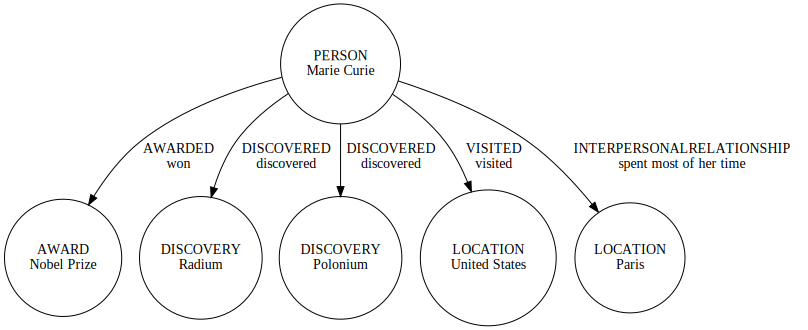

In [30]:
#| echo: true
#| code-fold: true
from graphviz import Digraph

dot = Digraph()
i = 0
for node in nodes[i]:
    if node['type'] != "OTHER":
        dot.node(str(node['id']), node['type']+"\n"+node['label'], shape='circle', width='1', height='1')
for edge in edges[i]:
    if edge["type"] != "OTHER": #and nodes[i][edge["source"]]["type"]!= "OTHER" and nodes[i][edge["target"]]["type"]!= "OTHER":
        dot.edge(str(edge['source']), str(edge['target']), label=edge['type']+"\n"+ edge['label'])
print(texts[i])
dot

## Chunk 2

In 1894, she met Pierre Curie, a 35-year-old physicist at a French technical college who had been studying crystals and magnetism. More than a decade before, he and his brother Jacques had discovered piezoelectricity, the electric charge produced in solid materials under pressure. Pierre was taken by Marie’s uncommon intellect and drive, and he proposed to her. They were married in 1895 in a civil service attended by family and a few friends.


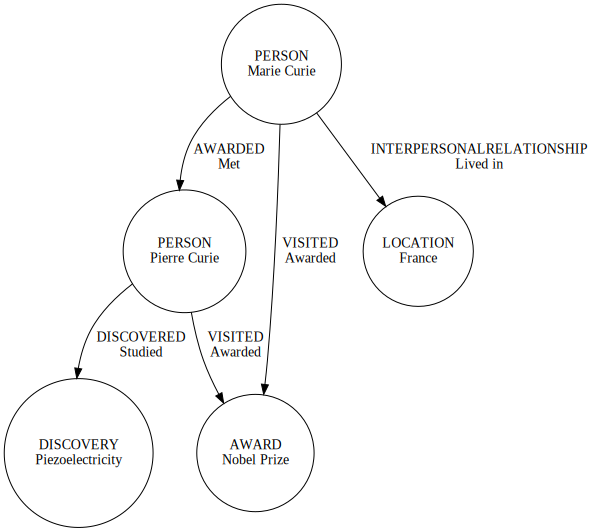

In [31]:
#| echo: true
#| code-fold: true
from graphviz import Digraph

dot = Digraph()
i = 1
for node in nodes[i]:
    if node['type'] != "OTHER":
        dot.node(str(node['id']), node['type']+"\n"+node['label'], shape='circle', width='1', height='1')
for edge in edges[i]:
    if edge["type"] != "OTHER": #and nodes[i][edge["source"]]["type"]!= "OTHER" and nodes[i][edge["target"]]["type"]!= "OTHER":
        dot.edge(str(edge['source']), str(edge['target']), label=edge['type']+"\n"+ edge['label'])
print(texts[i])
dot

## Chunk 3

Both Curies shared the Nobel Prize in physics with Becquerel in 1903. It was the first Nobel to be awarded to a woman. In 1911, rumors spread that Curie was having an affair with the prominent physicist Paul Langevin, a man five years her junior who had been Pierre’s student and had worked closely with Albert Einstein. The front-page coverage of the scandal threatened to overshadow another news story later that year: her second Nobel Prize.


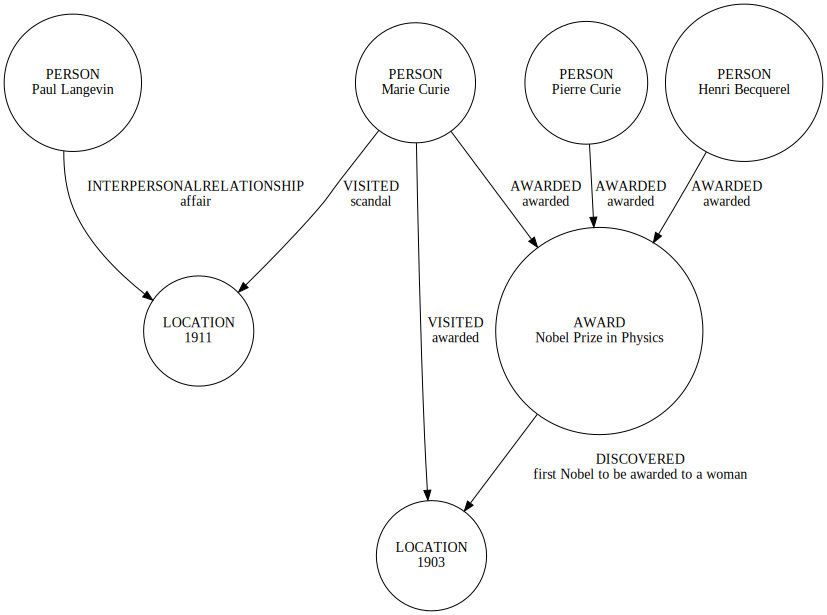

In [32]:
#| echo: true
#| code-fold: true
from graphviz import Digraph

dot = Digraph()
i = 2
for node in nodes[i]:
    if node['type'] != "OTHER":
        dot.node(str(node['id']), node['type']+"\n"+node['label'], shape='circle', width='1', height='1')
for edge in edges[i]:
    if edge["type"] != "OTHER": #and nodes[i][edge["source"]]["type"]!= "OTHER" and nodes[i][edge["target"]]["type"]!= "OTHER":
        dot.edge(str(edge['source']), str(edge['target']), label=edge['type']+"\n"+ edge['label'])
print(texts[i])
dot

## Chunk 4

This one, in chemistry, was for the discovery of polonium and radium. In her acceptance speech in Stockholm, she paid tribute to her husband but also made clear that her work was independent from his, spelling out their separate contributions and describing the discoveries she had made after his death.



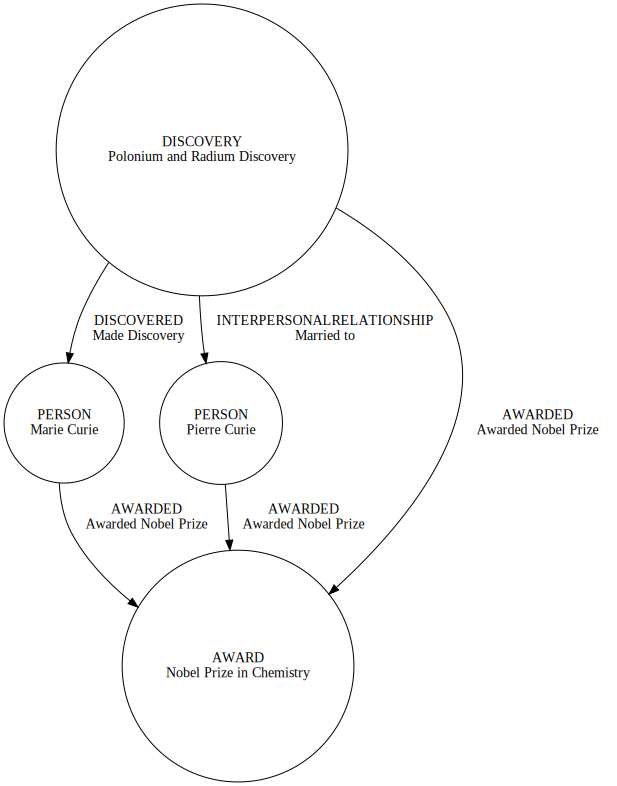

In [33]:
#| echo: true
#| code-fold: true
from graphviz import Digraph

dot = Digraph()
i = 3
for node in nodes[i]:
    if node['type'] != "OTHER":
        dot.node(str(node['id']), node['type']+"\n"+node['label'], shape='circle', width='1', height='1')
for edge in edges[i]:
    if edge["type"] != "OTHER":
        dot.edge(str(edge['source']), str(edge['target']), label=edge['type']+"\n"+ edge['label'])
print(texts[i])
dot

:::

###

In [34]:
#| echo: true
import pandas as pd

df_nodes = pd.DataFrame(nodes[0])
df_edges = pd.DataFrame({
    'source': [nodes[0][edge['source']]['label'] for edge in edges[0]],
    'target': [nodes[0][edge['target']]['label'] for edge in edges[0]],
    'type': [edge['type'] for edge in edges[0]],
    'label': [edge['label'] for edge in edges[0]]
})
for i in range(1,len(texts)):
    df_nodes_aux = pd.DataFrame({
        'id': [node['id']+len(df_nodes) for node in nodes[i]],
        'label': [node['label'] for node in nodes[i]],
        'type': [node['type'] for node in nodes[i]]
    })
    df_edges_aux = pd.DataFrame({
        'source': [nodes[i][edge['source']]['label'] for edge in edges[i]],
        'target': [nodes[i][edge['target']]['label'] for edge in edges[i]],
        'type': [edge['type'] for edge in edges[i]],
        'label': [edge['label'] for edge in edges[i]]
    })
    df_nodes = pd.concat([df_nodes, df_nodes_aux])
    df_edges = pd.concat([df_edges, df_edges_aux])

df_nodes=df_nodes[df_nodes["type"]!="OTHER"].drop_duplicates(subset="label")
df_edges=df_edges[df_edges["type"]!="OTHER"]

### Insert nodes to the graph db

In [37]:
#| echo: true
import kuzu

db = kuzu.Database()
conn = kuzu.Connection(db)
# create schema
conn.execute("CREATE NODE TABLE Person(name STRING, PRIMARY KEY (name))");
conn.execute("CREATE NODE TABLE Award(name STRING, PRIMARY KEY (name))");
conn.execute("CREATE NODE TABLE Discovery(name STRING, PRIMARY KEY (name))");
conn.execute("CREATE NODE TABLE Location(name STRING, PRIMARY KEY (name))");
# copy from dataframes
df_nodes_person = df_nodes[df_nodes["type"] == "PERSON"][["label"]]
df_nodes_award = df_nodes[df_nodes["type"] == "AWARD"][["label"]]
df_nodes_discovery = df_nodes[df_nodes["type"] == "DISCOVERY"][["label"]]
df_nodes_location = df_nodes[df_nodes["type"] == "LOCATION"][["label"]]
conn.execute("COPY Person FROM df_nodes_person");
conn.execute("COPY Award FROM df_nodes_award");
conn.execute("COPY Discovery FROM df_nodes_discovery");
conn.execute("COPY Location FROM df_nodes_location");

### Check for nodes

In [38]:
#| echo: true
result = conn.execute("MATCH (person:Person) RETURN person.name;")
while result.has_next():
    print(result.get_next())

['Marie Curie']
['Pierre Curie']
['Henri Becquerel']
['Paul Langevin']


### Insert edges to the graph db

In [40]:
#| echo: true
conn.execute("CREATE REL TABLE Awarded(FROM Person TO Award)"); # create schema
conn.execute("CREATE REL TABLE Discovered(FROM Person TO Discovery)");
conn.execute("CREATE REL TABLE Interpersonal_Relationship(FROM Person TO Person)");
conn.execute("CREATE REL TABLE Visited(FROM Person TO Location)");
def my_func(edge_type: str, source: str, target: str):
    mask1 = [a in list(df_nodes[df_nodes["type"] == source]['label']) for a in df_edges[df_edges["type"] == edge_type]["source"]]
    mask2 = [a in list(df_nodes[df_nodes["type"] == target]['label']) for a in df_edges[df_edges["type"] == edge_type]["target"]]
    mask = [a & b for a,b in zip(mask1,mask2)]
    return df_edges[df_edges["type"] == edge_type][mask]
df_edges_awarded = my_func("AWARDED", "PERSON", "AWARD")[["source", "target"]]
df_edges_discovered = my_func("DISCOVERED", "PERSON", "DISCOVERY")[["source", "target"]]
df_edges_visited = my_func("VISITED", "PERSON", "LOCATION")[["source", "target"]]
df_edges_interpersonal_relationship = my_func("INTERPERSONALRELATIONSHIP", "PERSON", "PERSON")[["source", "target"]]
conn.execute("COPY Discovered FROM df_edges_discovered"); # copy from dataframes
conn.execute("COPY Awarded FROM df_edges_awarded");
conn.execute("COPY Visited FROM df_edges_visited");
conn.execute("COPY Interpersonal_Relationship FROM df_edges_interpersonal_relationship");

### Check for edges

In [41]:
#| echo: true
result = conn.execute("MATCH (a)-[:DISCOVERED]->(c) RETURN a.name, c.name;")
while result.has_next():
    print(result.get_next())

['Marie Curie', 'Polonium']
['Marie Curie', 'Radium']
['Pierre Curie', 'Piezoelectricity']


# KG-based Agents

### {.nostretch}

![](./assets/KG-Agent.jpg "Knowledge Graph Based Agent"){fig-align="center" width="80%"}

## Tools

### Tool: Query Checker

In [42]:
#| echo: true
def build_kuzu_query_checker_prompt(cypher_query):
    return (
    f"\n{cypher_query}\n"
    "Double check the Kùzu dialect of Cypher for the query above "
    "for common mistakes, including:\n"
    "- Using the correct number of arguments for functions\n"
    "- Casting to the correct data type\n"
    "- Do not omit the relationship pattern.\n" 
    "- Always use `()-[]->()` instead of `()->()`.\n\n"
    "If there are any of the above mistakes, rewrite the query. "
    "If there are no mistakes, just reproduce the original query.\n\n"
    "Output the final Kùzu Cypher query only.\n\n"
    "Kùzu Cypher Query: "
    )

### Tool: Query Checker

In [43]:
#| echo: true
def query_checker_tool(cypher_query):
    user_prompt = build_kuzu_query_checker_prompt(cypher_query)
    response = llm.create_chat_completion(
        messages=[{"role": "user", "content": user_prompt}]
    )
    return response["choices"][0]["message"]["content"]


query_checker_tool(
"MATCH (p:Person)-[:Discovered]-<(:Discovery {name: 'Polonium'})\nRETURN *"
)

"MATCH (p:Person)-[:Discovered]->(d:Discovery {name: 'Polonium'})\nRETURN *"

In [44]:
#| output: false
query_checker_tool("""MATCH (s:SONG)-[:IN_ALBUM]-<(:ALBUM {name: 'The Black Album'})\nRETURN COUNT(s)""")

"MATCH (s:SONG)-[:IN_ALBUM]->(a:ALBUM)\nWHERE a.name = 'The Black Album'\nRETURN COUNT(s)"

### Tool: Query Generator + Executor

In [45]:
#| echo: true
from langchain_community.graphs import KuzuGraph

graph_db_schema = KuzuGraph(db).get_schema
print(graph_db_schema)

Node properties: [{'properties': [('name', 'STRING')], 'label': 'Person'}, {'properties': [('name', 'STRING')], 'label': 'Discovery'}, {'properties': [('name', 'STRING')], 'label': 'Award'}, {'properties': [('name', 'STRING')], 'label': 'Location'}]
Relationships properties: [{'properties': [], 'label': 'Awarded'}, {'properties': [], 'label': 'Discovered'}, {'properties': [], 'label': 'Interpersonal_Relationship'}, {'properties': [], 'label': 'Visited'}]
Relationships: ['(:Person)-[:Awarded]->(:Award)', '(:Person)-[:Discovered]->(:Discovery)', '(:Person)-[:Interpersonal_Relationship]->(:Person)', '(:Person)-[:Visited]->(:Location)']



### Tool: Query Generator + Executor

In [46]:
#| echo: true
def build_kuzu_prompt(query, graph_db_schema=graph_db_schema):
    return """Task: Generate Kùzu Cypher statement to query a graph database.

Instructions:
Generate the Kùzu dialect of Cypher with the following rules in mind:
1. Do not omit the relationship pattern. Always use `()-[]->()` instead of `()->()`.
2. Do not include triple backticks ``` in your response. Return only Cypher.
3. Do not return any notes or comments in your response.

Use only the provided relationship types and properties in the schema.
Do not use any other relationship types or properties that are not provided.
Schema:\n""" + graph_db_schema + """
\nExample:
The question is:\n"Which songs does the load album have?"
MATCH (a:ALBUM {name: 'Load'})<-[:IN_ALBUM]-(s:SONG) RETURN s.name
Note: Do not include any explanations or apologies in your responses.
Do not respond to any questions that might ask anything else than for you to construct a Cypher statement.
Do not include any text except the generated Cypher statement.

The question is:\n""" + query

### Tool: Query Generator + Executor

In [64]:
#| echo: true
def query_generator_tool(query):
    user_prompt = build_kuzu_prompt(query)
    output = llm.create_chat_completion(
        messages = [{"role": "user", "content": user_prompt}]
    )
    cypher_query = output['choices'][0]['message']['content']
    cypher_query = query_checker_tool(cypher_query)
    print(f"\x1b[33m Cypher query: {cypher_query} \x1b[0m")
    response = conn.execute(f"{cypher_query}");
    df = response.get_as_pl()
    col_name = df.columns[0]
    _values = df[col_name].to_list()
    return f"[{col_name}: {_values}]"
query_generator_tool("What discovery is Marie Curie famous for?")

 Cypher query: MATCH (p:Person {name: 'Marie Curie'})-[:Discovered]->(d:Discovery) RETURN d.name 


"[d.name: ['Radium', 'Polonium']]"

In [48]:
#| output: false
query_generator_tool("What discovery is Marie Curie famous for?")

 Cypher query: MATCH (p:Person {name: 'Marie Curie'})-[:Discovered]->(d:Discovery) RETURN d.name 


"[d.name: ['Radium', 'Polonium']]"

### Tool: Conversational Response

In [49]:
#| echo: true
def conversational_response(text):
    return text

In [50]:
#| output: false
conversational_response("""Respond to the user's greeting in a friendly manner.""")

"Respond to the user's greeting in a friendly manner."

## ReAct agent

In [51]:
#| echo: true
from pydantic import BaseModel, Field


class Reason_and_Act(BaseModel):
    Scratchpad: str = Field(
        ...,
        description="Information from the Observation useful to answer the question",
    )
    Thought: str = Field(
        ...,
        description="It describes your thoughts about the question you have been asked",
    )
    Action: Literal["conversational_response", "query_generator", "query_checker"] = (
        Field(..., description="The action to take")
    )
    Action_Input: str = Field(..., description="The arguments of the Action.")

### ReAct Agent

In [52]:
#| echo: true
class Final_Answer(BaseModel):
    Scratchpad: str = Field(
        ...,
        description="Information from the Observation useful to answer the question",
    )
    Final_Answer: str = Field(
        ..., description="Answer to the question grounded on the Observation"
    )

### ReAct Agent

In [53]:
#| echo: true
class Decision(BaseModel):
    Decision: Reason_and_Act | Final_Answer

### ReAct Agent

In [54]:
#| echo: true
from outlines.fsm.json_schema import convert_json_schema_to_str
from outlines.fsm.json_schema import build_regex_from_schema

schema_str = convert_json_schema_to_str(json_schema=Decision.schema_json())
regex_str = build_regex_from_schema(schema_str)

### ReAct Agent

In [55]:
#| echo: true
def generate_hermes_prompt(question, schema=""):
    return (
        "<|im_start|>system\n"
        "You are a world class AI model who answers questions in JSON with correct Pydantic schema."
        f"\nHere's the JSON schema you must adhere to:\n<schema>\n{schema}\n</schema>\n"
        "You run in a loop of Scratchpad, Thought, Action, Action Input, PAUSE, Observation."
        "\nAt the end of the loop you output a Final Answer. "
        "\n- Use Scratchpad to store the information from the observation useful to answer the question"
        "\n- Use Thought to describe your thoughts about the question you have been asked "
        "and reflect carefully about the Observation if it exists. "
        "\n- Use Action to run one of the actions available to you. "
        "\n- Use Action Input to input the arguments of the selected action - then return PAUSE. "
        "\n- Observation will be the result of running those actions. "
        "\nYour available actions are:\n"
        "query_generator:\n" 
        "e.g. query_generator: Who is Marie Curie related to?\n"
        "Returns a detailed and correct Kùzu Cypher query\n"
        "query_checker:\n"
        "e.g. query_checker: MATCH (a:ALBUM {name: 'The Black Album'})<-[:IN_ALBUM]-(s:SONG) RETURN COUNT(s)\n"
        "Returns a detailed and correct Kùzu Cypher query after double checking the query for common mistakes\n"
        "conversational_reponse:"
        "e.g. conversational_response: Hi!\n"
        "Returns a conversational response to the user\n"
        "DO NOT TRY TO GUESS THE ANSWER. Begin! <|im_end|>"
        "\n<|im_start|>user\n" + question + "<|im_end|>"
        "\n<|im_start|>assistant\n"
    )

### ReAct Agent

In [56]:
#| echo: true
from outlines import generate, models
model = models.LlamaCpp(llm)

### ReAct Agent

In [57]:
#| echo: true
class ChatBot:
    def __init__(self, prompt=""):
        self.prompt = prompt

    def __call__(self, user_prompt):
        self.prompt += user_prompt
        result = self.execute()
        return result
        
    def execute(self):
        generator = generate.regex(model, regex_str)
        result = generator(self.prompt, max_tokens=1024, temperature=0, seed=42)
        return result

### ReAct Agent

In [58]:
#| echo: true
import json

def query(question, max_turns=5):
    i = 0
    next_prompt = (
        "\n<|im_start|>user\n" + question + "<|im_end|>"
        "\n<|im_start|>assistant\n"
    )
    previous_actions = []
    while i < max_turns:
        i += 1
        prompt = generate_hermes_prompt(question=question, schema=Decision.schema_json())
        bot = ChatBot(prompt=prompt)
        result = bot(next_prompt)
        json_result = json.loads(result)['Decision']
        if "Final_Answer" not in list(json_result.keys()):
            scratchpad = json_result['Scratchpad'] if i == 0 else ""
            thought = json_result['Thought']
            action = json_result['Action']
            action_input = json_result['Action_Input']
            print(f"\x1b[34m Scratchpad: {scratchpad} \x1b[0m")
            print(f"\x1b[34m Thought: {thought} \x1b[0m")
            print(f"\x1b[36m  -- running {action}: {str(action_input)}\x1b[0m")
            if action + ": " + str(action_input) in previous_actions:
                observation = "You already run that action. **TRY A DIFFERENT ACTION INPUT.**"
            else:
                if action=="query_checker":
                    try:
                        observation = query_checker_tool(str(action_input))
                    except Exception as e:
                        observation = f"{e}"
                elif action=="query_generator":
                    try:
                        observation = query_generator_tool(str(action_input))
                    except Exception as e:
                        observation = f"{e}"
                elif action=="conversational_response":
                    try:
                        observation = conversational_response(str(action_input))
                        observation += "\nAnswer to the user."
                    except Exception as e:
                        observation = f"{e}"
            print()
            print(f"\x1b[33m Observation: {observation} \x1b[0m")
            print()
            previous_actions.append(action + ": " + str(action_input))
            next_prompt += (
                "\nScratchpad: " + scratchpad +
                "\nThought: " + thought +
                "\nAction: " + action  +
                "\nAction Input: " + action_input +
                "\nObservation: " + str(observation)
            )
        else:
            scratchpad = json_result["Scratchpad"]
            final_answer = json_result["Final_Answer"]
            print(f"\x1b[34m Scratchpad: {scratchpad} \x1b[0m")
            print(f"\x1b[34m Final Answer: {final_answer} \x1b[0m")
            return final_answer
    print(f"\nFinal Answer: I am sorry, but I am unable to answer your question. Please provide more information or a different question.")
    return "No answer found"

### ReAct Agent

In [65]:
#| echo: true
query("Query the database to see which discovery did Pierre Curie do?")

 Scratchpad:  
 Thought: To find out which discovery Pierre Curie is known for, I should query the database for information about his scientific contributions. 
  -- running query_generator: MATCH (p:PERSON {name: 'Pierre Curie'})-[:DISCOVERED]->(d:DISCOVERY) RETURN d.name
 Cypher query: MATCH (p:PERSON {name: 'Pierre Curie'})-[:DISCOVERED]->(d:DISCOVERY) RETURN d.name 

 Observation: [d.name: ['Piezoelectricity']] 

 Scratchpad: Pierre Curie is known for discovering piezoelectricity. 
 Final Answer: Pierre Curie discovered piezoelectricity. 


'Pierre Curie discovered piezoelectricity.'

### ReAct Agent

In [66]:
#| echo: true
query("Query the database to see which discovery did Marie Curie do?")

 Scratchpad:  
 Thought: To find out which discovery Marie Curie is known for, I will query the database to search for her discoveries. 
  -- running query_generator: MATCH (p:PERSON {name: 'Marie Curie'})-[:DISCOVERED]->(d:DISCOVERY) RETURN d.name
 Cypher query: MATCH (p:PERSON {name: 'Marie Curie'})-[:DISCOVERED]->(d:DISCOVERY) RETURN d.name 

 Observation: [d.name: ['Radium', 'Polonium']] 

 Scratchpad: Marie Curie is known for discovering Radium and Polonium. 
 Final Answer: Marie Curie discovered Radium and Polonium. 


'Marie Curie discovered Radium and Polonium.'

### ReAct Agent

In [67]:
#| echo: true
query("Tell me a joke")

 Scratchpad:  
 Thought: To provide a joke, I will use my knowledge base to find a suitable joke that is appropriate for all ages. 
  -- running conversational_response: Tell a family-friendly joke.

 Observation: Tell a family-friendly joke.
Answer to the user. 

 Scratchpad: To provide a joke, I will use my knowledge base to find a suitable joke that is appropriate for all ages. 
 Final Answer: Why don't scientists trust atoms? Because they make up everything! 


"Why don't scientists trust atoms? Because they make up everything!"

# Conclusions

### Conclusions

- Structured Outputs + Structured Generation help us to generate Knowledge Graphs from unstructured data
- Structured Outputs + Structured Generation help us create KG-based Agents that can query graph databases as well as calling other tools

### References {visibility="uncounted"}

- Kùzu (graph DB) + Llama.cpp (inference) + Outlines (structured outputs) + LangChain (framework) + Solara (visualization)

### How was my presentation? {visibility="uncounted"}

Please, leave me your anonymous feedback at [https://www.admonymous.co/alonsosilva](https://www.admonymous.co/alonsosilva)